In [108]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
Hello = tf.constant("Herro")

In [110]:
World = tf.constant("World")

In [111]:
with tf.Session() as sess:
    result = sess.run(Hello + World)

In [112]:
result

b'HerroWorld'

In [113]:
a = tf.constant(1)

In [114]:
b = tf.constant(2
            )

In [115]:
a + b


<tf.Tensor 'add_27:0' shape=() dtype=int32>

In [116]:
a + b

<tf.Tensor 'add_28:0' shape=() dtype=int32>

In [117]:
with tf.Session() as sess:
    result = sess.run(a + b)

In [118]:
result

3

In [119]:
#random normal distribution
distRand = tf.random_normal((4,4), mean = 0, stddev = 1000)

In [120]:
#random uniform distribution
distUni = tf.random_uniform((4,4), minval=-100, maxval=100)

In [121]:
#Graphs
node1 = tf.constant(10)
node2 = tf.constant(10)
node3 = node1 + node2

In [122]:
with tf.Session() as sess:
    result = sess.run(node3)

In [123]:
result

20

In [124]:
#Placeholders and Variables-

In [125]:
tensor = tf.random_normal((4,4), 0, 1)

In [126]:
variable = tf.Variable(initial_value=tensor)

In [127]:
sess = tf.InteractiveSession()

In [128]:
init = tf.global_variables_initializer()
sess.run(init)
sess.run(variable
        )

array([[ 0.68786758, -0.98004884,  0.06414459,  0.70011705],
       [-0.26227996, -0.9776392 , -1.23165596,  0.75734931],
       [-1.70753133, -2.22274399,  0.01464159,  1.24138904],
       [-1.43174803,  0.03736574,  0.57669711, -0.82609797]], dtype=float32)

In [129]:
#simple quick classification NN

In [130]:
np.random.seed(101)

In [131]:
tf.set_random_seed(101)

In [132]:
#Gurt out some random data points
random_points = np.random.uniform(0, 100, (5,5))

In [133]:
random_points_2 = np.random.uniform(0, 100, (5,1))

In [134]:
random_points

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562,
         68.52769817],
       [ 83.38968626,  30.69662197,  89.36130797,  72.15438618,
         18.99389542],
       [ 55.42275911,  35.2131954 ,  18.18924027,  78.56017619,
         96.54832224],
       [ 23.23536618,   8.35614337,  60.35484223,  72.89927573,
         27.62388285],
       [ 68.53063288,  51.78674742,   4.84845374,  13.78692376,
         18.69674261]])

In [135]:
random_points_2


array([[ 99.43179012],
       [ 52.06653967],
       [ 57.87895355],
       [ 73.48190583],
       [ 54.19617722]])

In [136]:
a = tf.placeholder(tf.float32)

In [137]:
b = tf.placeholder(tf.float32
                  )

In [138]:
add = a + b

In [139]:
mult_cult = tf.matmul(a, b)

In [140]:
with tf.Session() as sess:
    result = sess.run(add, feed_dict={a: random_points, b: random_points_2})
    print(result)

[[ 151.07165527  156.49855042  102.27921295  116.58396149  167.95948792]
 [ 135.45622253   82.76316071  141.42784119  124.22093201   71.06043243]
 [ 113.30171204   93.09214783   76.06819153  136.43911743  154.42727661]
 [  96.7172699    81.83804321  133.83674622  146.38117981  101.10578918]
 [ 122.72680664  105.98292542   59.04463196   67.98310089   72.89292145]]


In [141]:
n1_features = 10
#3 layers of dense neurons
n1_neurons = 3

In [142]:
x = tf.placeholder(tf.float32, (None, n1_features))

In [143]:
W = tf.Variable(tf.random_normal([n1_features, n1_neurons]))

In [144]:
b = tf.Variable(tf.ones(n1_neurons))

In [145]:
xW = tf.matmul(x, W)

In [146]:
z = tf.add(xW , b)

In [147]:
#activation function yeet
a = tf.sigmoid(z)

In [148]:
init = tf.global_variables_initializer()

In [149]:
with tf.Session() as ur_mom:
    ur_mom.run(init)
    
    result = ur_mom.run(a, feed_dict={x: np.random.random([2, n1_features])})

In [150]:
result

array([[ 0.96223646,  0.51029634,  0.97965473],
       [ 0.94138932,  0.25016916,  0.69048887]], dtype=float32)

In [151]:
#regression lmao

In [152]:
noise_1 = np.random.uniform(-1.5, 1.5, 10)

In [153]:
x_data = np.linspace(0,10,10) + noise_1

In [154]:
noise_2 = np.random.uniform(-1.5, 1.5, 10)

In [155]:
y_complements = np.linspace(0,10,10) + noise_2

In [156]:
#plot data

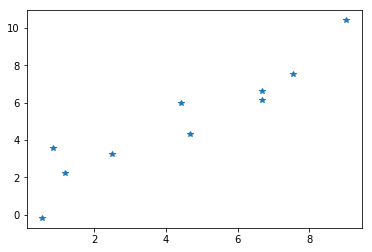

In [157]:
plt.plot(x_data, y_complements, "*")

In [158]:
#because np.random.rand() returns an array the [0] is nescesary
b = tf.Variable(np.random.rand(1)[0])
m = tf.Variable(np.random.rand(1)[0])

In [159]:
error = 0

for x,y in zip(x_data, y_complements):
    y_hat = (m*x) + b
    #want to minimize this
    error += (y - y_hat)**2

In [160]:
peepee = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = peepee.minimize(error)

In [161]:
init = tf.global_variables_initializer()

In [162]:
with tf.Session() as ur_mom:
    ur_mom.run(init)
    training_steps = 1000
    for i in range(training_steps):
        ur_mom.run(train)
    final_slope, final_intercept = ur_mom.run([m,b])

In [163]:
x_pred_graph = np.linspace(-1, 11, 10)
y_pred_plot = final_slope * x_pred_graph + final_intercept

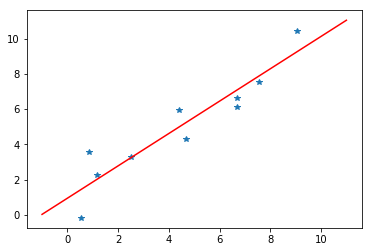

In [164]:
plt.plot(x_data, y_complements, "*")
plt.plot(x_pred_graph, y_pred_plot, "r")